In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy
import seaborn as sns

In [78]:
train_auc = pd.read_csv(os.path.join("curves", "AUC_train.csv"))
val_auc = pd.read_csv(os.path.join("curves", "AUC_val.csv"))
test_auc = pd.read_csv(os.path.join("curves", "AUC_test.csv"))

train_loss = pd.read_csv(os.path.join("curves", "loss_train.csv"))
val_loss = pd.read_csv(os.path.join("curves", "loss_val.csv"))
test_loss = pd.read_csv(os.path.join("curves", "loss_test.csv"))

In [93]:
def draw_curves(df, ylabel, title, filename):
    fig, ax = plt.subplots(figsize=(4,4))
    plt.plot(df)
    plt.title(title)
    ax.set_ylabel(ylabel)
    plt.xlabel("epoch")
    plt.xticks([i * 2 for i in range(10)])
    plt.xlim(left=0, right=19)
    ax.legend()
    plt.savefig(os.path.join("..", "media", f"{filename}.png"))
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


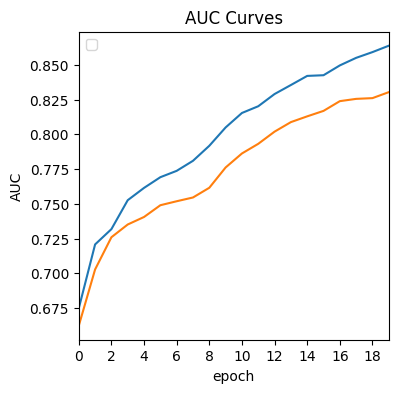

In [94]:
df = pd.DataFrame({
    "train": train_auc["Value"],
    "val": val_auc["Value"]
})

draw_curves(df, "AUC", "AUC Curves", "auc_curve_train_val")

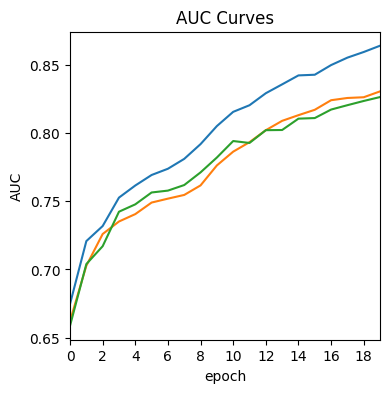

In [86]:
df2 = pd.DataFrame({
    "train": train_auc["Value"],
    "val": val_auc["Value"],
    "test": test_auc["Value"]
})

draw_curves(df2, "AUC", "AUC Curves", "auc_curve_train_val_test")

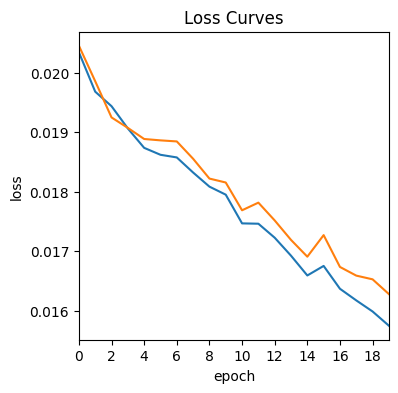

In [87]:
df3 = pd.DataFrame({
    "train": train_loss["Value"],
    "val": val_loss["Value"]
})

draw_curves(df3, "loss", "Loss Curves", "loss_curve_train_val")

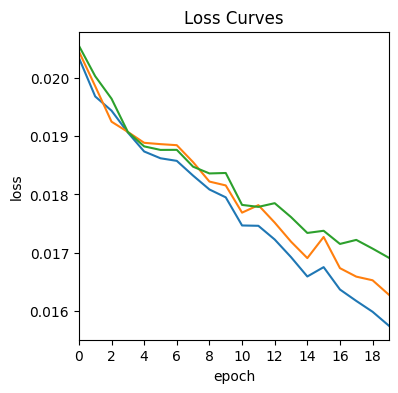

In [88]:
df4 = pd.DataFrame({
    "train": train_loss["Value"],
    "val": val_loss["Value"],
    "test": test_loss["Value"]
})

draw_curves(df4, "loss", "Loss Curves", "loss_curve_train_val_test")